In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from sklearn import manifold, datasets, decomposition
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.preprocessing import StandardScaler
import random
from scipy import ndimage
from matplotlib.patches import Ellipse
import matplotlib.cm as cm

In [ ]:
# Define tSNE function
def tsne_clustering(data, Y, n_components, suppress_output=False):
  n_iter = 250
  perplexity = 20
  cterm = Y
  print("\n\nPerplexity = ", perplexity)
  tsne = manifold.TSNE(n_components=n_components, init='random', method='barnes_hut', random_state=0, perplexity=perplexity,n_iter=n_iter, verbose=2)
  Y = tsne.fit_transform(data)
  if n_components == 2:
    if not suppress_output:
      fig = plt.figure(figsize=(8, 6))
      ax = plt.axes()
      string = "Perplexity = " + str(perplexity)
      plt.title(string)
      cmap = matplotlib.cm.get_cmap('magma')
      normalize = matplotlib.colors.Normalize(vmin=min(cterm), vmax=max(cterm))
      colors = [cmap(normalize(value)) for value in cterm]
      sc = plt.scatter(Y[:,0], Y[:,1], color=colors, s=8)
      cax, _ = matplotlib.colorbar.make_axes(ax)
      cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
      plt.show()
  return Y

Consider the dataset $f:\chi\rightarrow Y$. Here, $\chi$ is mnist_training_data[i][0][0] and $Y$ is mnist_training_data[i][1]

In [ ]:
batch_size = 32

# load training data downloaded into data/ folder
mnist_training_data = torchvision.datasets.MNIST('data/', train=True, download=True,
                                                 transform=torchvision.transforms.Compose([
                                                                                           torchvision.transforms.ToTensor(),
                                                                                           torchvision.transforms.Normalize((0.1307,), (0.3081,))]))
# load test data
mnist_test_data = torchvision.datasets.MNIST('data/', train=False, download=True,
                                                 transform=torchvision.transforms.Compose([
                                                                                           torchvision.transforms.ToTensor(),
                                                                                           torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
X = []
Y = []
for i in range(len(mnist_training_data)):
  X.append(mnist_training_data[i][0][0].flatten().detach().numpy())
  Y.append(mnist_training_data[i][1])

In [ ]:
print(len(X))
print(np.shape(X[0]))

60000
(784,)


5

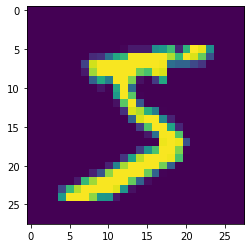

In [ ]:
# demo visual
plt.imshow(torch.tensor(X[0]).reshape((28,28)))
mnist_training_data[0][1]

$\forall y \in Y$, define the following hashmap, $D_y = \{x \in \chi | f(x) = y\}$. For this, construct $D_i, \forall i \in \{0,...,9\}$

In [ ]:
hashmaps = {}
for i in range(10):
  hashmaps[i]=[]
for i in range(len(X)):
  value = Y[i]
  hashmaps[value].append(X[i])

In [ ]:
for i in range(10):
  print(i, len(hashmaps[i]))

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


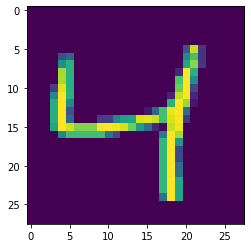

In [ ]:
plt.imshow(torch.tensor(hashmaps[4][0]).reshape((28,28)))

In [ ]:
tsne_data=tsne_clustering(X,Y,1)



Perplexity =  20
[t-SNE] Computing 61 nearest neighbors...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Indexed 60000 samples in 0.046s...
[t-SNE] Computed neighbors for 60000 samples in 258.917s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed condi



Perplexity =  20
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.042s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 60000 samples in 256.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed conditional probabilities for sample 14000 / 600

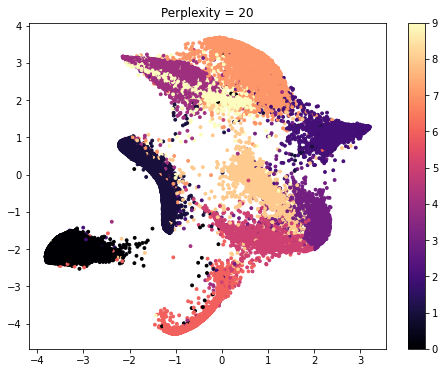

In [ ]:
tsne_data2=tsne_clustering(X,Y,2)

In [ ]:
tsne_data3=tsne_clustering(X,Y,3)



Perplexity =  20


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.042s...
[t-SNE] Computed neighbors for 60000 samples in 270.486s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

In [ ]:
# PCA down to single dimension
def original_data_bootstrap(hashmaps, index, plot=True):
  iters = 5000
  num_samples = 1500
  variances = []
  X0 = hashmaps[index]
  pca = PCA(n_components=1)
  pca.fit(X0)
  X0 = pca.transform(X0)
  X0 = X0.reshape((-1, ))
  # Computating variance
  for i in range(iters):    
    # k = random.sample(X0, num_samples)
    k = np.random.choice(X0, size = num_samples ,replace=False)
    sample_variance = np.var(k)
    # laplacian = ndimage.laplace(random.sample(hashmaps[index], num_samples))
    variances.append(sample_variance)
  # Calculating standard error
  mean_var = np.mean(variances)
  # se = np.sqrt((1/iters) * np.sum((np.array(variances) - mean_var)**2))
  # variance_estimate = se/np.sqrt(num_samples)
  variance_estimate = np.mean(variances)
  if plot:
    plt.hist(variances, density=False)  # density=False would make counts
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.show()

  return variance_estimate, variances

# 1D
def tsne_data_bootstrap(tsne_data, index, Y, plot=True):
  tsne0 = tsne_data[np.array(Y) == index]
  iters = 5000
  num_samples = 1500
  variances = []
  expectations = []
  q1 = []
  q3 = []
  tsne0 = tsne0.reshape((-1, ))
  for i in range(iters):
    # Estimate mean and standard error
    k = np.random.choice(tsne0, size = num_samples ,replace=False)
    sample_variance = np.var(k)
    variances.append(sample_variance)

  if plot:
    plt.hist(variances, density=False)  # density=False would make counts
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.show()


  # Calculate standard error
  mean_variance = np.mean(variances)
  # variance_estimate = np.sqrt((1/(iters)) * np.sum((np.array(variances) - mean_variance)**2))
  variance_estimate = mean_variance
  # mean_val = tuple([sum(y) / len(y) for y in zip(*expectations)])
  # q1_val = tuple([sum(y) / len(y) for y in zip(*q1)])
  # q3_val = tuple([sum(y) / len(y) for y in zip(*q3)])
  return variance_estimate, variances#, list(mean_val), list(q1_val), list(q3_val)

In [ ]:
from sklearn.decomposition import PCA
X0 = hashmaps[0]
print(len(X0))
pca = PCA(n_components=1)
print(X0[0].shape)
pca.fit(X0)
# Convert x0 to 1d array
X0 = pca.transform(X0)

# for i in range(10):
#   X0 = hashmaps[i]
#   pca = PCA(n_components=1)
#   pca.fit(X0)
#   X0 = pca.transform(X0)
#   X0 = 
#   plt.imshow(mean_img, cmap="gray")
#   plt.show()
#   plt.imshow(ndimage.laplace(mean_img), cmap='gray')
#   plt.show()
# # mean     = sum(x)/length(x)
# # variance = sum((x - mean(x)).^2)/(length(x) - 1);
# # plt.imshow(X0_1, cmap='gray')
# # plt.show()t
# # plt.imshow(ndimage.laplace(X0_1), cmap='gray')
# # plt.show()
# # print(X0_1.shape)
# # variance_0 = ndimage.laplace(X0_1).var()
# print(variance_0)

5923
(784,)


Class number: 0


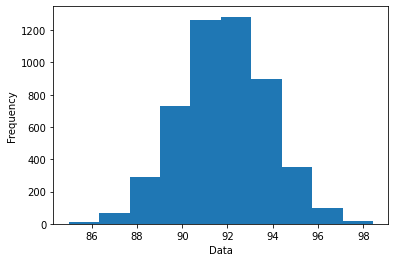

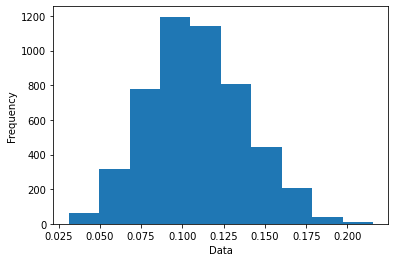

0.10876708 91.85430676947949


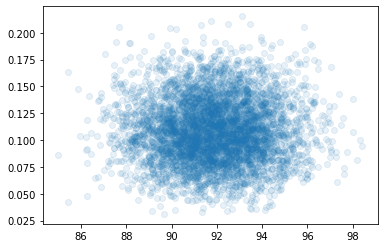

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.00369701]
 [0.00369701 1.        ]]
Class number: 1


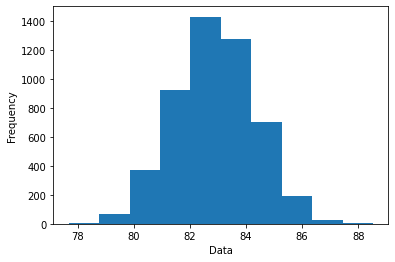

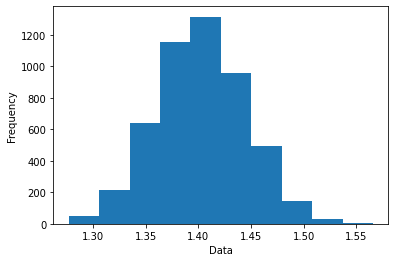

1.4027436 82.87313819024132


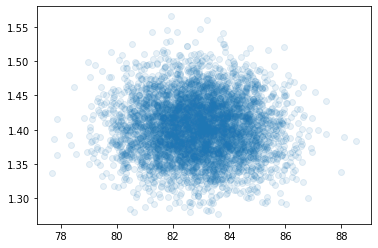

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.02747128]
 [-0.02747128  1.        ]]
Class number: 2


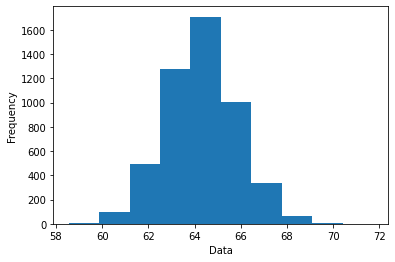

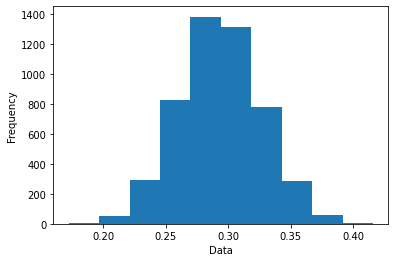

0.29345024 64.29212548645606


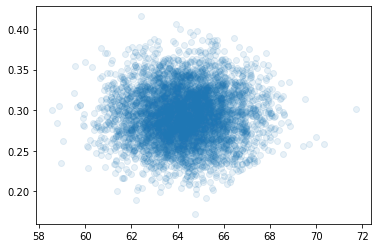

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01665014]
 [0.01665014 1.        ]]
Class number: 3


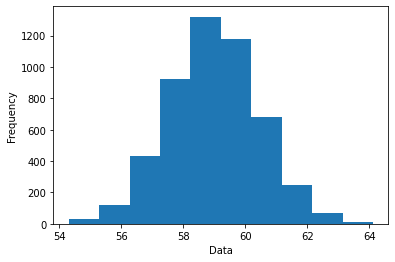

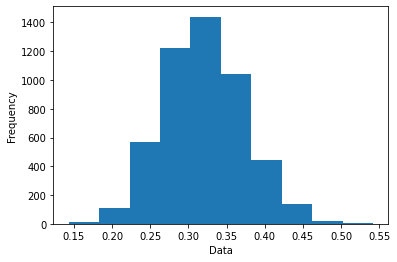

0.32046583 58.98222078058919


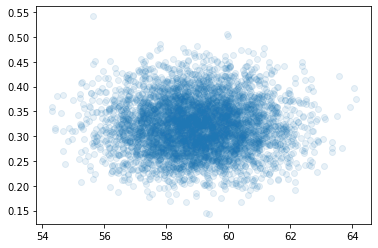

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00157682]
 [-0.00157682  1.        ]]
Class number: 4


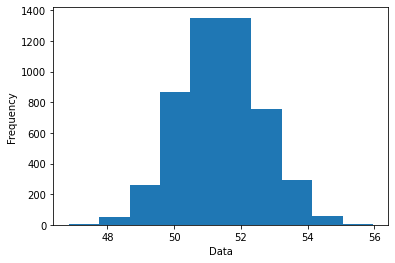

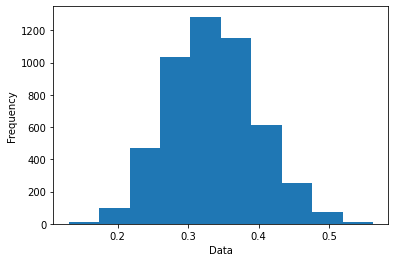

0.33513844 51.38705043828557


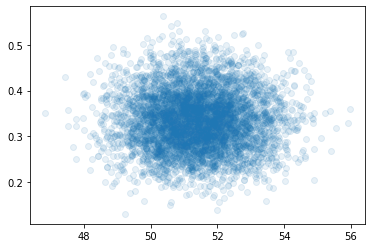

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00461746]
 [-0.00461746  1.        ]]
Class number: 5


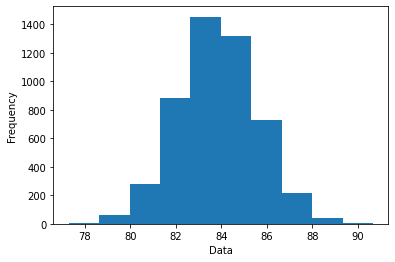

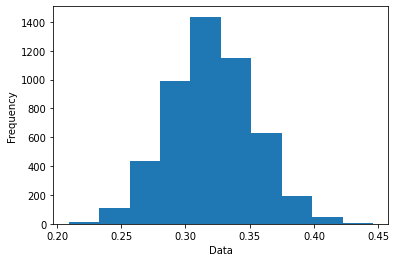

0.3203079 83.84166298418172


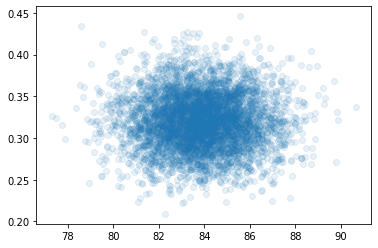

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.        -0.0036647]
 [-0.0036647  1.       ]]
Class number: 6


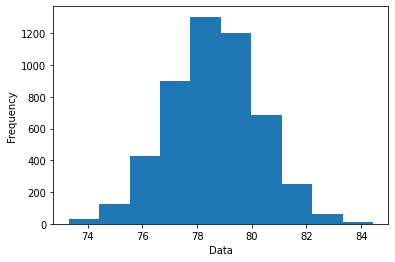

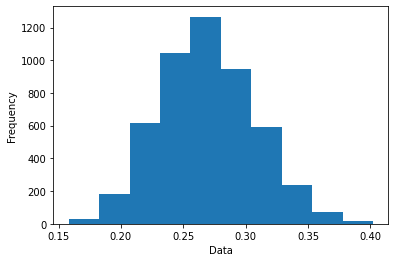

0.26935035 78.61948425217179


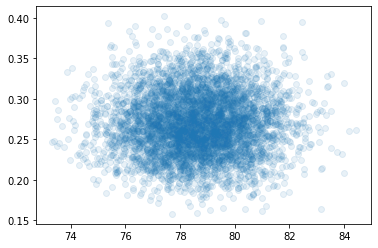

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01111537]
 [0.01111537 1.        ]]
Class number: 7


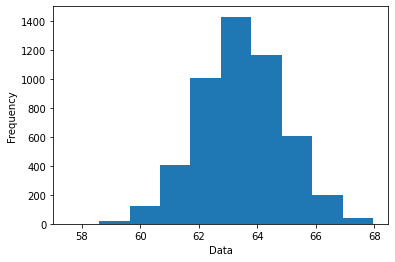

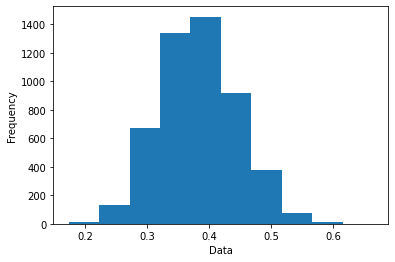

0.38280675 63.444717450414494


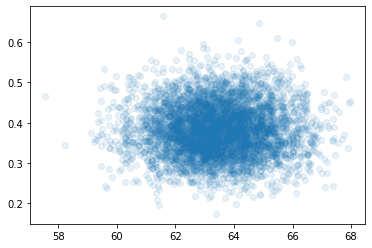

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.00521975]
 [0.00521975 1.        ]]
Class number: 8


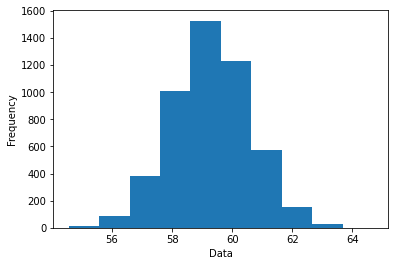

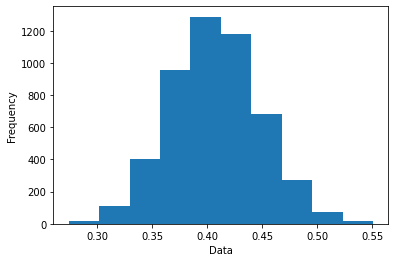

0.4074351 59.288976411404796


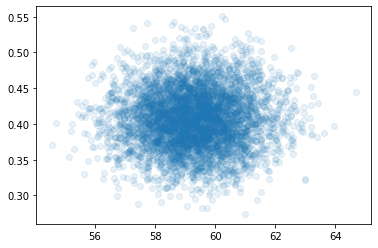

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01992936]
 [0.01992936 1.        ]]
Class number: 9


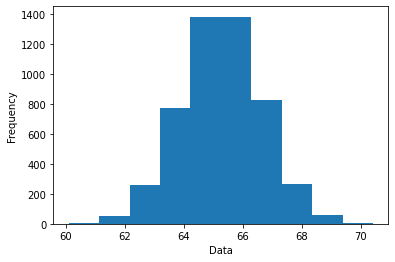

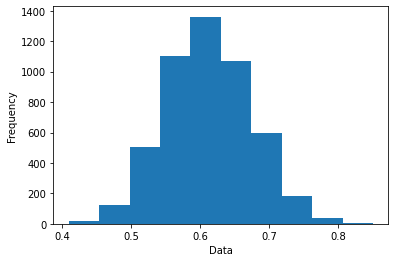

0.6115165 65.28339209159127


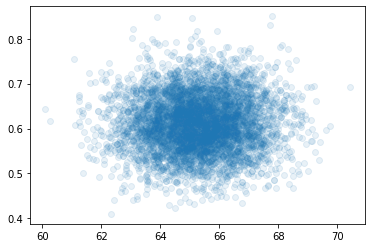

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.02365847]
 [0.02365847 1.        ]]
[91.74553969215272, 81.47039461228417, 63.99867525013556, 58.6617549476405, 51.05191199815343, 83.52135507373937, 78.35013390226868, 63.061910702262715, 58.88154132205505, 64.67187561591378]


In [ ]:
# 1D case
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
v_org = []
v_tsne = []
v_plot = []
expectations = []
q1 = []
q3 = []

for number in range(10):
  print("Class number: " + str(number))
  v, v_s = original_data_bootstrap(hashmaps, number)
  v_org.append(v)
  # tsne_var, tsne_mean, q1_val, q3_val = tsne_data_bootstrap(number, Y)
  tsne_var, variances = tsne_data_bootstrap(tsne_data, number, Y)
  v_tsne.append(tsne_var)
  print(tsne_var, v_org[number])
  plt.scatter(v_s, variances, alpha = 0.1)
  plt.show()
  v_plot.append(np.abs(tsne_var - v_org[number]))

  #perform Kolmogorov-Smirnov test
  # p value almost zero => not from same distribution, and no correlation
  print(ks_2samp(v_s, variances))
  # No correlation too!
  print(np.corrcoef(v_s, variances))
print(v_plot)

Class number: 0
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.        0.0132087]
 [0.0132087 1.       ]]
Class number: 1
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.00000000e+00 -2.08222554e-04]
 [-2.08222554e-04  1.00000000e+00]]
Class number: 2
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00559084]
 [-0.00559084  1.        ]]
Class number: 3
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00628545]
 [-0.00628545  1.        ]]
Class number: 4
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01841929]
 [0.01841929 1.        ]]
Class number: 5
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01251769]
 [-0.01251769  1.        ]]
Class number: 6
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.00946218]
 [0.00946218 1.        ]]
Class number: 7
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01068294]
 [-0.01068294  1.        ]]
Class number: 8
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.        -0.0052916]
 [-0.0052916 

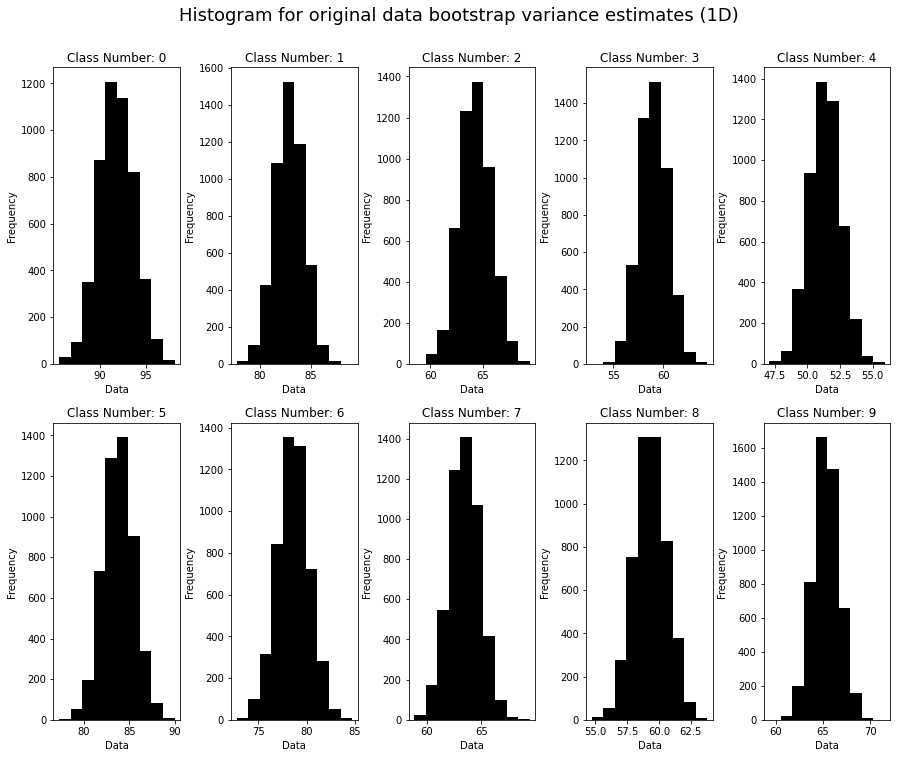

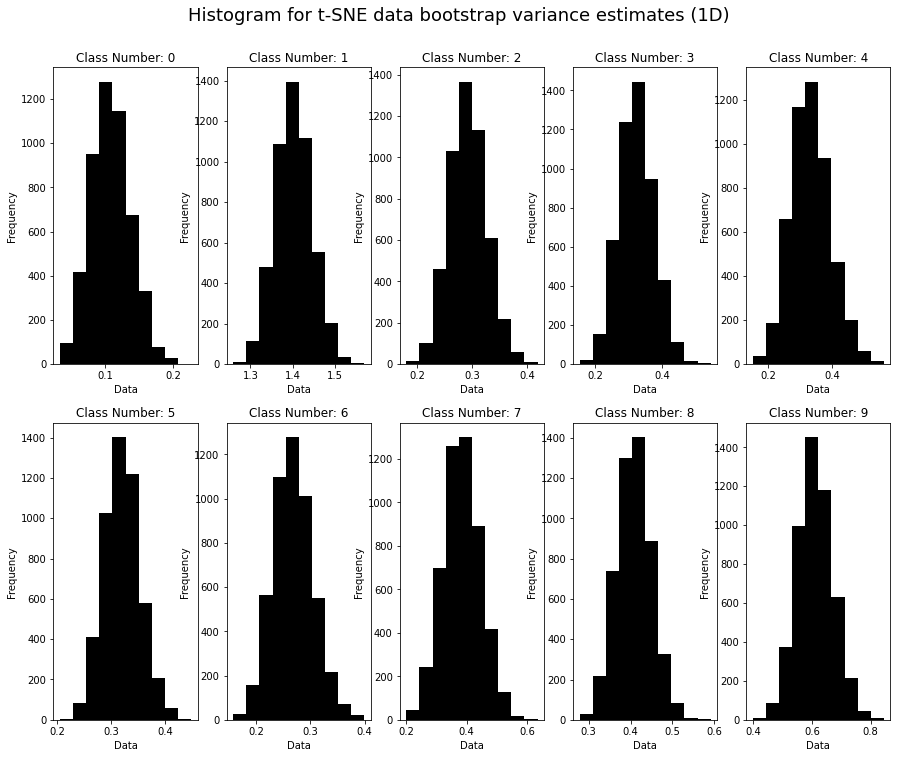

In [ ]:
# 1D case
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
v_org = []
v_tsne = []
v_plot = []
expectations = []
q1 = []
q3 = []


fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=5)
fig.subplots_adjust(wspace=0.4)
plt.suptitle("Histogram for original data bootstrap variance estimates (1D)", fontsize=18, y=0.95)

axes = axes.flatten()

fig2, axes2 = plt.subplots(figsize=(15, 12), nrows=2, ncols=5)
fig.subplots_adjust(wspace=0.4)
plt.suptitle("Histogram for t-SNE data bootstrap variance estimates (1D)", fontsize=18, y=0.95)

axes2 = axes2.flatten()

for number in range(10):
  print("Class number: " + str(number))
  v, v_s = original_data_bootstrap(hashmaps, number, False)
  axes[number].hist(v_s, color='k')
  axes[number].set_ylabel('Frequency')
  axes[number].set_xlabel('Data')
  axes[number].title.set_text('Class Number: '+ str(number))
  v_org.append(v)

  # tsne_var, tsne_mean, q1_val, q3_val = tsne_data_bootstrap(number, Y, False)
  tsne_var, variances = tsne_data_bootstrap(tsne_data, number, Y, False)
  axes2[number].hist(variances, color='k')
  axes2[number].set_ylabel('Frequency')
  axes2[number].set_xlabel('Data')
  axes2[number].title.set_text('Class Number: '+ str(number))
  # v_org.append(v)

  v_tsne.append(tsne_var)
  v_plot.append(np.abs(tsne_var - v_org[number]))

  #perform Kolmogorov-Smirnov test
  # p value almost zero => not from same distribution, and no correlation
  print(ks_2samp(v_s, variances))
  # No correlation too!
  print(np.corrcoef(v_s, variances))
plt.show()
# print(v_plot)

In [ ]:
# >= 2 dimensions
def original_data_bootstrap(hashmaps, index, n, plot=True):
  iters = 1000
  num_samples = 600
  variances = []
  X0 = hashmaps[index]
  pca = PCA(n_components=n)
  pca.fit(X0)
  X0 = pca.transform(X0)
  print(np.shape(X0))
  # Computating variance
  for i in range(iters):    
    # k = random.sample(X0, num_samples)
    k = X0[np.random.choice(X0.shape[0], size=num_samples, replace=False), :]
    # k = np.random.choice(X0, size = num_samples ,replace=False)
    k1, k2 = k[:, 0], k[:, 1]
    sample_cov = np.cov(k1, k2)
    P, D, Q = np.linalg.svd(sample_cov, full_matrices=False)
    sing_values = np.diag(D)
    # laplacian = ndimage.laplace(random.sample(hashmaps[index], num_samples))
    variances.append(np.linalg.norm(sing_values))
  # Calculating standard error
  mean_var = np.mean(variances)
  # se = np.sqrt((1/iters) * np.sum((np.array(variances) - mean_var)**2))
  # variance_estimate = se/np.sqrt(num_samples)
  variance_estimate = np.mean(variances)
  if plot:
    plt.hist(variances, density=False)  # density=False would make counts
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.show()

  return variance_estimate, variances


def tsne_data_bootstrap(tsne_data, index, Y, plot=True):
  tsne0 = tsne_data[np.array(Y) == index]
  iters = 1000
  num_samples = 600
  variances = []
  expectations = []
  q1 = []
  q3 = []
  for i in range(iters):
    # Estimate mean and standard error
    rand_rows = tsne0[np.random.choice(tsne0.shape[0], size=num_samples, replace=False), :]
    xvals = rand_rows[:, 0]
    # k = np.random.choice(tsne0, size = num_samples ,replace=False)
    # sample_variance = np.var(k)
    yvals = rand_rows[:, 1]
    # mean_x, mean_y = np.mean(xvals), np.mean(yvals)
    # q1_x, q1_y = xvals[int(len(xvals)*0.25)], yvals[int(len(xvals)*0.25)]
    # q3_x, q3_y = xvals[int(len(xvals)*0.75)], yvals[int(len(xvals)*0.75)]
    sample_cov = np.cov(xvals, yvals)
    P, D, Q = np.linalg.svd(sample_cov, full_matrices=False)
    sing_values = np.diag(D)
    # S_xx = (1/num_samples) * np.sum((xvals - mean_x)**2)
    # S_yy = (1/num_samples) * np.sum((yvals - mean_y)**2)
    # S_xy = (1/num_samples) * np.sum((xvals - mean_x)*(yvals - mean_y))
    # variance = np.sqrt(S_xx * S_yy - S_xy * S_xy)
    variances.append(np.linalg.norm(sing_values))
    # expectations.append((mean_x, mean_y))
    # q1.append((q1_x, q1_y))
    # q3.append((q3_x, q3_y))

  if plot:
    plt.hist(variances, density=False)  # density=False would make counts
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.show()


  # Calculate standard error
  mean_variance = np.mean(variances)
  # variance_estimate = np.sqrt((1/(iters)) * np.sum((np.array(variances) - mean_variance)**2))
  variance_estimate = mean_variance
  # mean_val = tuple([sum(y) / len(y) for y in zip(*expectations)])
  # q1_val = tuple([sum(y) / len(y) for y in zip(*q1)])
  # q3_val = tuple([sum(y) / len(y) for y in zip(*q3)])
  return variance_estimate, variances#, list(mean_val), list(q1_val), list(q3_val)

Class number: 0
(5923, 2)


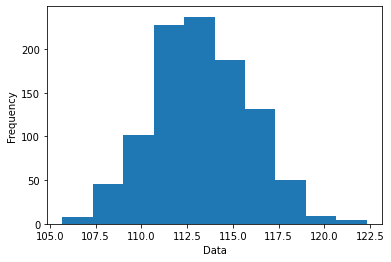

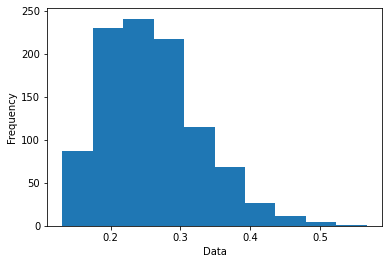

0.2590783503131735 113.26913465818522


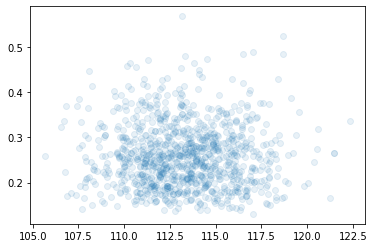

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01896473]
 [-0.01896473  1.        ]]
Class number: 1
(6742, 2)


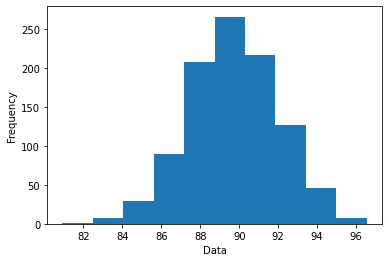

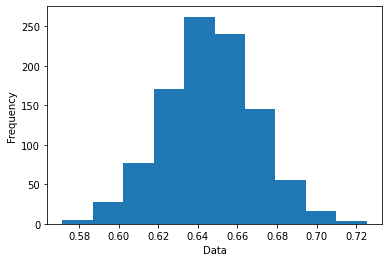

0.6462052155415052 89.72958385674538


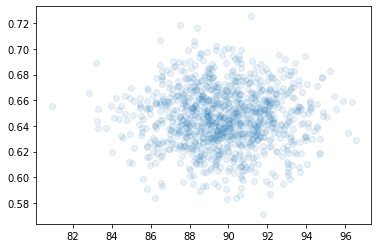

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00288015]
 [-0.00288015  1.        ]]
Class number: 2
(5958, 2)


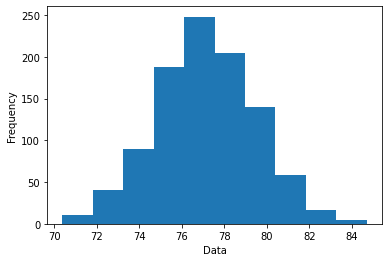

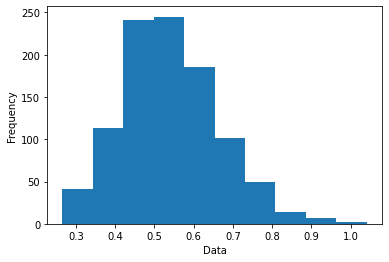

0.5406771235827175 77.16120810451173


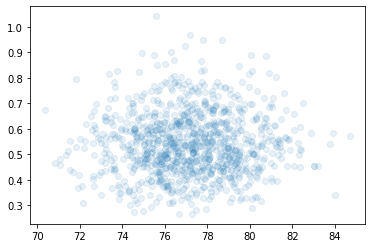

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.02187241]
 [0.02187241 1.        ]]
Class number: 3
(6131, 2)


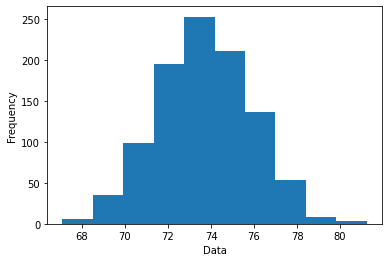

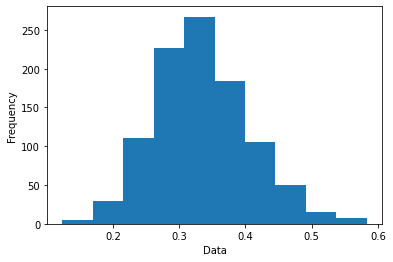

0.33435135865253396 73.70536122585385


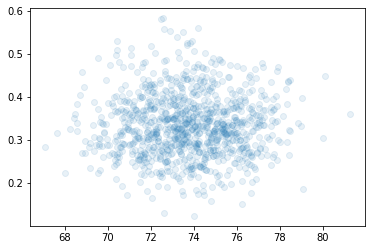

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.00676617]
 [0.00676617 1.        ]]
Class number: 4
(5842, 2)


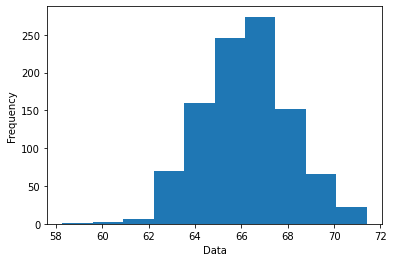

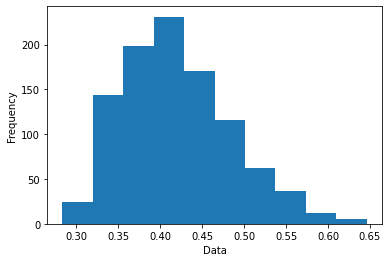

0.420334646050419 66.19364713771074


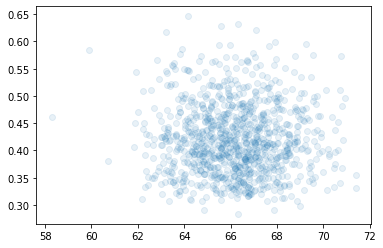

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01648474]
 [-0.01648474  1.        ]]
Class number: 5
(5421, 2)


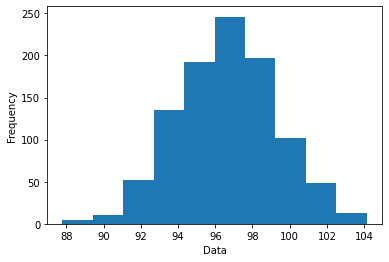

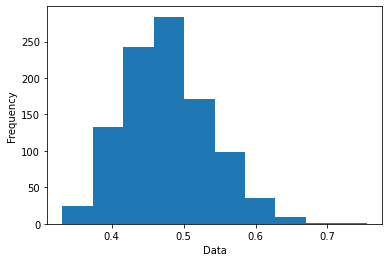

0.4772158779291011 96.66716909878166


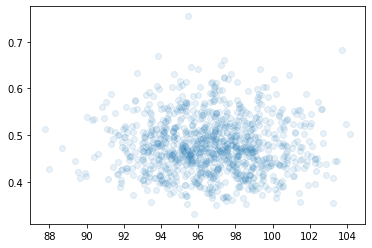

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01255889]
 [-0.01255889  1.        ]]
Class number: 6
(5918, 2)


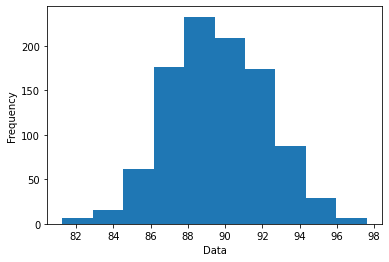

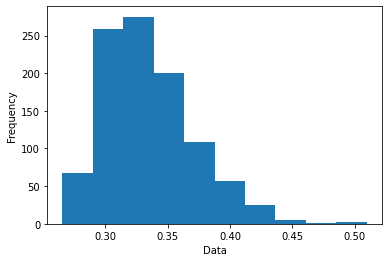

0.33494180794427486 89.55942128630628


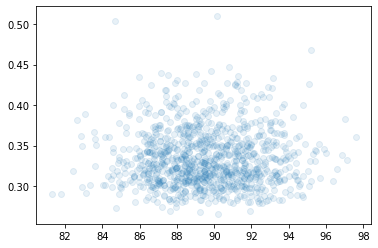

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.00555855]
 [0.00555855 1.        ]]
Class number: 7
(6265, 2)


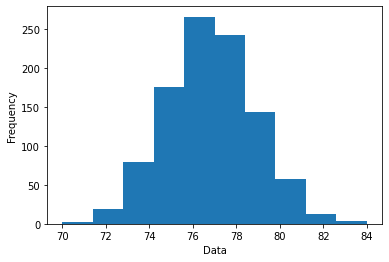

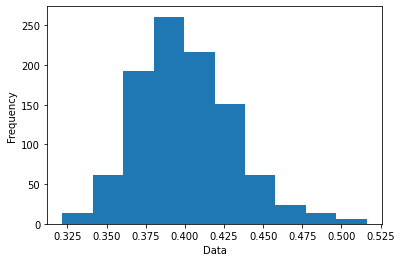

0.40035398422549723 76.81457138872504


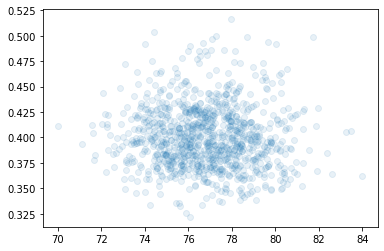

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.04096523]
 [-0.04096523  1.        ]]
Class number: 8
(5851, 2)


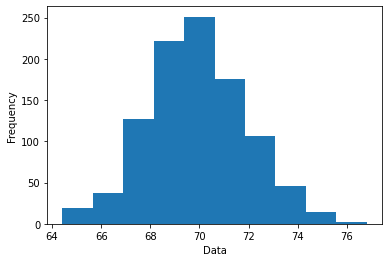

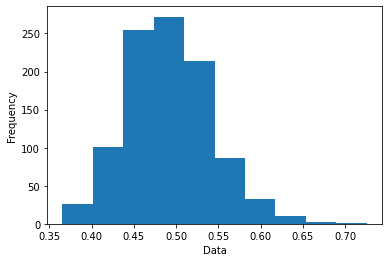

0.4920082344918833 69.9219541090427


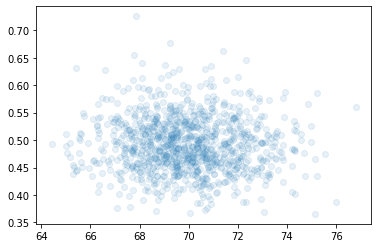

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.05172688]
 [-0.05172688  1.        ]]
Class number: 9
(5949, 2)


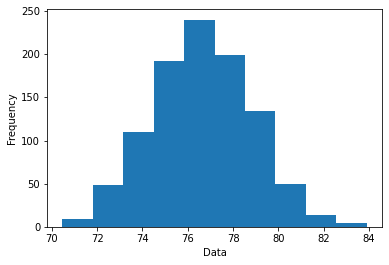

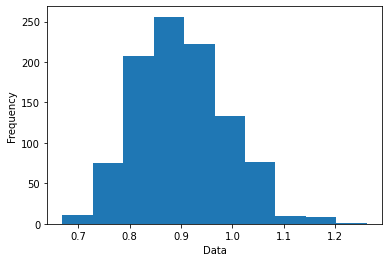

0.9007521427147067 76.63852897411539


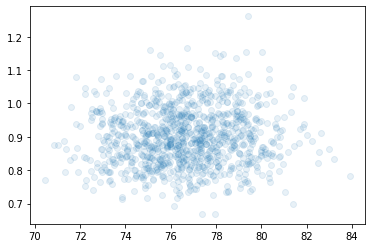

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.        0.0540511]
 [0.0540511 1.       ]]
[113.01005630787205, 89.08337864120388, 76.62053098092902, 73.37100986720131, 65.77331249166032, 96.18995322085256, 89.224479478362, 76.41421740449954, 69.42994587455082, 75.73777683140068]


In [ ]:
# 2D case
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
v_org = []
v_tsne = []
v_plot = []
expectations = []
q1 = []
q3 = []

for number in range(10):
  print("Class number: " + str(number))
  v, v_s = original_data_bootstrap(hashmaps, number, 2)
  v_org.append(v)
  # tsne_var, tsne_mean, q1_val, q3_val = tsne_data_bootstrap(number, Y)
  tsne_var, variances = tsne_data_bootstrap(tsne_data2, number, Y)
  v_tsne.append(tsne_var)
  print(tsne_var, v_org[number])
  plt.scatter(v_s, variances, alpha = 0.1)
  plt.show()
  v_plot.append(np.abs(tsne_var - v_org[number]))

  #perform Kolmogorov-Smirnov test
  # p value almost zero => not from same distribution, and no correlation
  print(ks_2samp(v_s, variances))
  # No correlation too!
  print(np.corrcoef(v_s, variances))
print(v_plot)

Class number: 0
(5923, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.02069868]
 [-0.02069868  1.        ]]
Class number: 1
(6742, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01772579]
 [0.01772579 1.        ]]
Class number: 2
(5958, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.04501936]
 [-0.04501936  1.        ]]
Class number: 3
(6131, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.02605401]
 [0.02605401 1.        ]]
Class number: 4
(5842, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.03154695]
 [-0.03154695  1.        ]]
Class number: 5
(5421, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01864387]
 [-0.01864387  1.        ]]
Class number: 6
(5918, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.02650642]
 [0.02650642 1.        ]]
Class number: 7
(6265, 2)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00665195]
 [-0.00665195  1.        ]]
Class number: 8
(5851, 2)
Ks

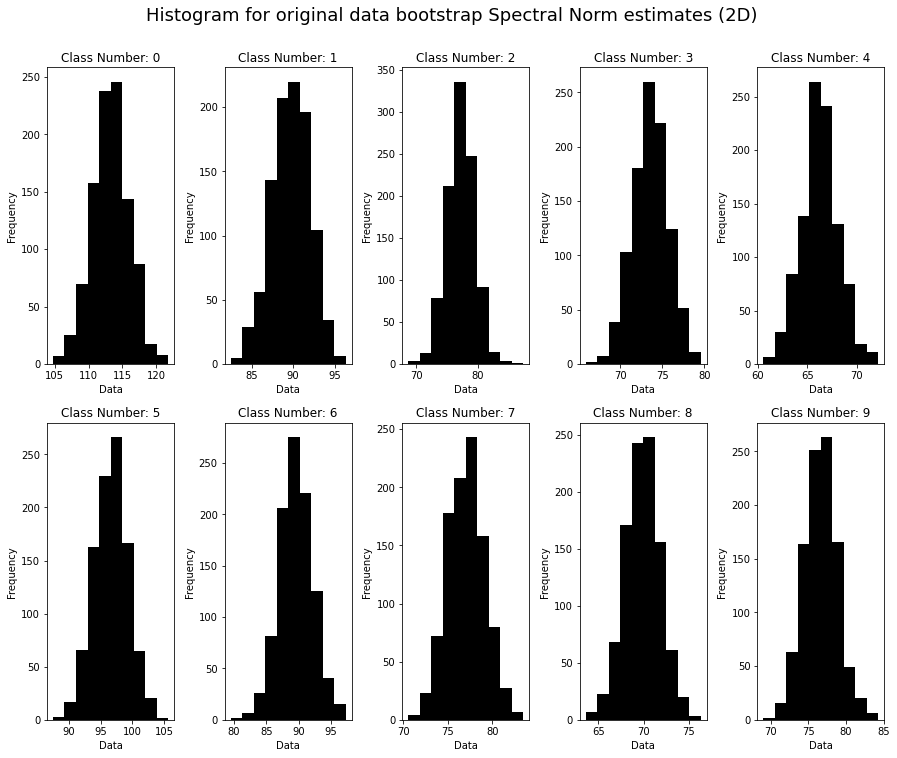

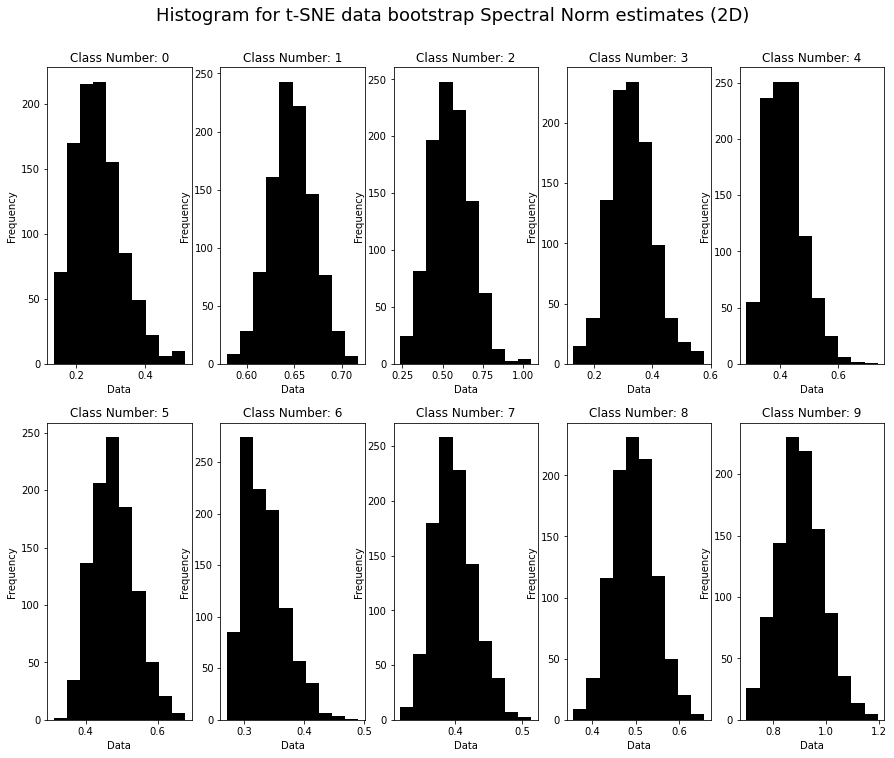

In [ ]:
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
v_org = []
v_tsne = []
v_plot = []
expectations = []
q1 = []
q3 = []

fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=5)
fig.subplots_adjust(wspace=0.4)
plt.suptitle("Histogram for original data bootstrap Spectral Norm estimates (2D)", fontsize=18, y=0.95)

axes = axes.flatten()

fig2, axes2 = plt.subplots(figsize=(15, 12), nrows=2, ncols=5)
fig.subplots_adjust(wspace=0.4)
plt.suptitle("Histogram for t-SNE data bootstrap Spectral Norm estimates (2D)", fontsize=18, y=0.95)

axes2 = axes2.flatten()

for number in range(10):
  print("Class number: " + str(number))
  v, v_s = original_data_bootstrap(hashmaps, number, 2, False)
  axes[number].hist(v_s, color='k')
  axes[number].set_ylabel('Frequency')
  axes[number].set_xlabel('Data')
  axes[number].title.set_text('Class Number: '+ str(number))
  v_org.append(v)

  # tsne_var, tsne_mean, q1_val, q3_val = tsne_data_bootstrap(number, Y, False)
  tsne_var, variances = tsne_data_bootstrap(tsne_data2, number, Y, False)
  axes2[number].hist(variances, color='k')
  axes2[number].set_ylabel('Frequency')
  axes2[number].set_xlabel('Data')
  axes2[number].title.set_text('Class Number: '+ str(number))
  # v_org.append(v)

  v_tsne.append(tsne_var)
  v_plot.append(np.abs(tsne_var - v_org[number]))

  #perform Kolmogorov-Smirnov test
  # p value almost zero => not from same distribution, and no correlation
  print(ks_2samp(v_s, variances))
  # No correlation too!
  print(np.corrcoef(v_s, variances))
plt.show()
# print(v_plot)

Class number: 0
(5923, 3)


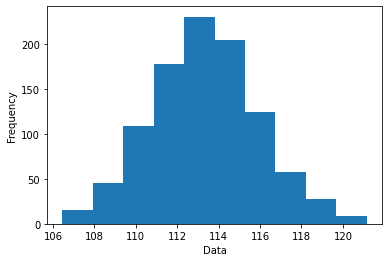

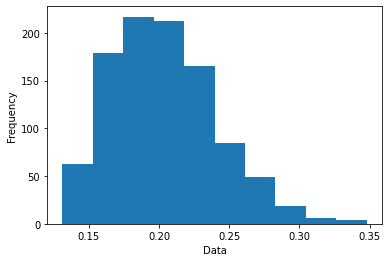

0.20371153329774086 113.35241032301087


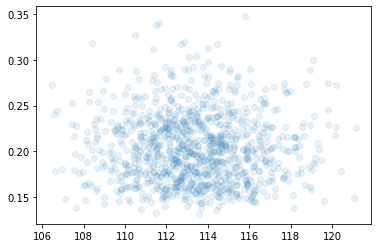

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00943046]
 [-0.00943046  1.        ]]
Class number: 1
(6742, 3)


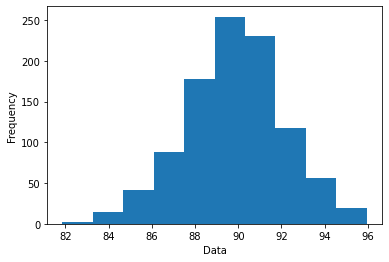

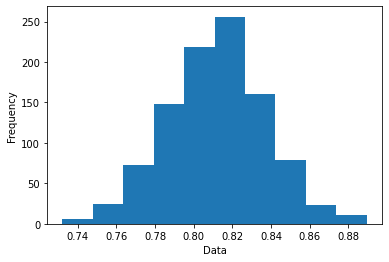

0.8119618577643531 89.83778294635762


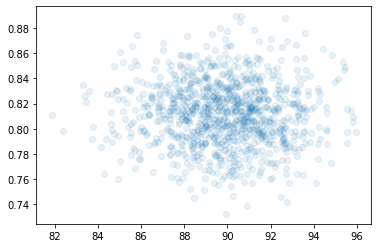

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.02738119]
 [-0.02738119  1.        ]]
Class number: 2
(5958, 3)


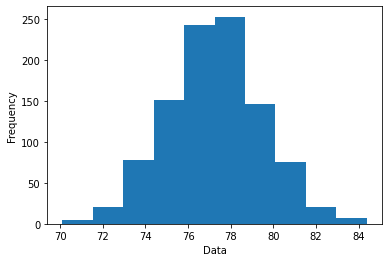

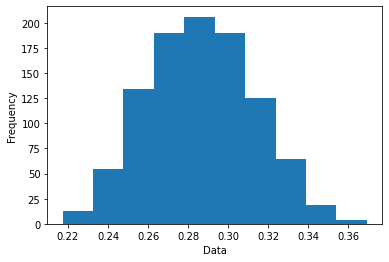

0.28661330217534836 77.22577283891488


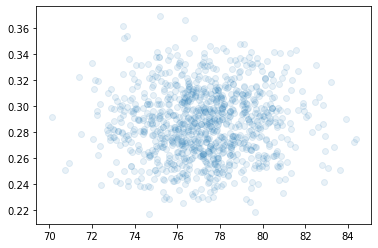

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.        0.0321585]
 [0.0321585 1.       ]]
Class number: 3
(6131, 3)


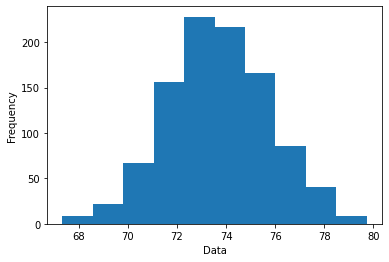

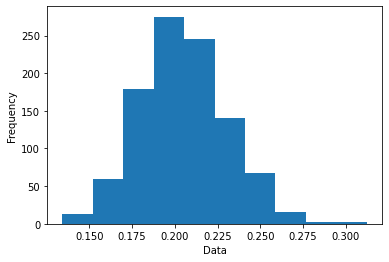

0.2052721879522931 73.68639326428845


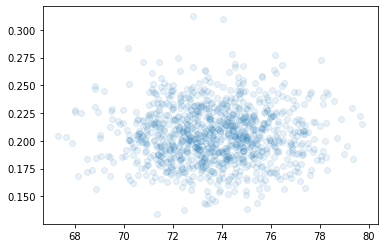

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01271707]
 [0.01271707 1.        ]]
Class number: 4
(5842, 3)


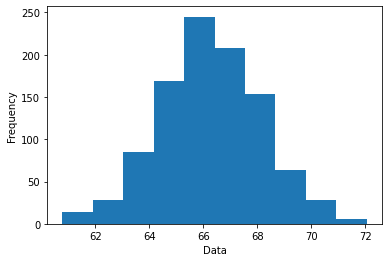

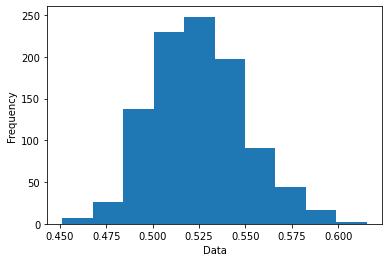

0.5247768806904687 66.27981591914414


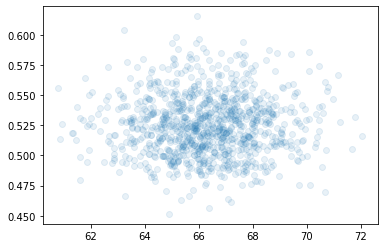

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01292802]
 [0.01292802 1.        ]]
Class number: 5
(5421, 3)


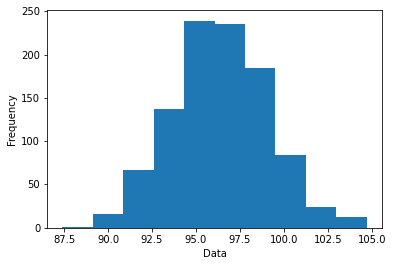

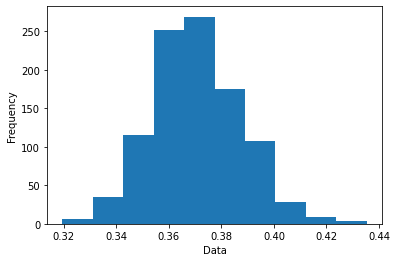

0.3706496059583003 96.41902508409109


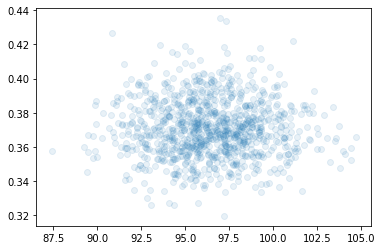

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00647877]
 [-0.00647877  1.        ]]
Class number: 6
(5918, 3)


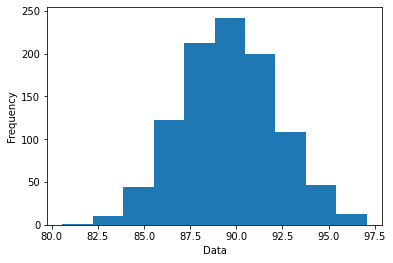

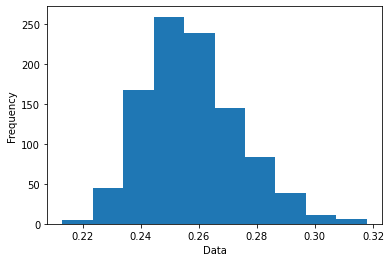

0.25772051411745134 89.61310077242048


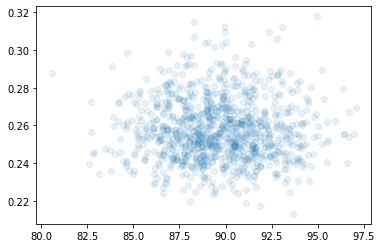

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01004984]
 [-0.01004984  1.        ]]
Class number: 7
(6265, 3)


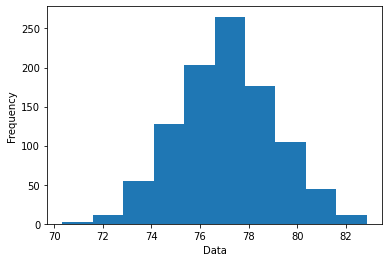

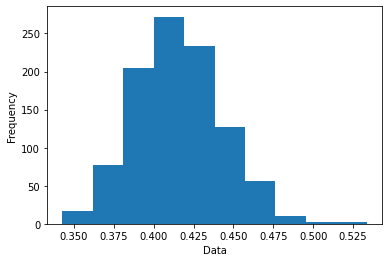

0.4155829084614676 77.08535968911312


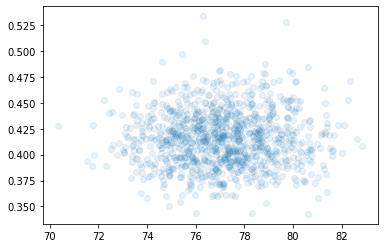

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01739503]
 [0.01739503 1.        ]]
Class number: 8
(5851, 3)


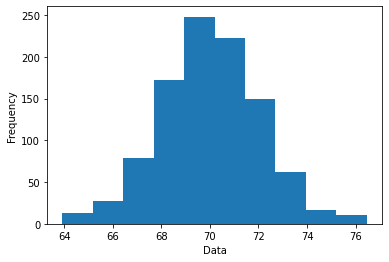

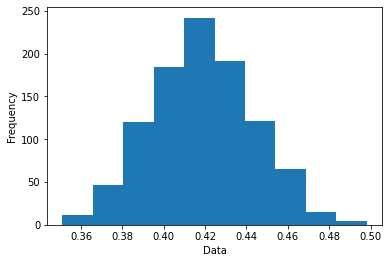

0.4188120185400547 70.01329618937038


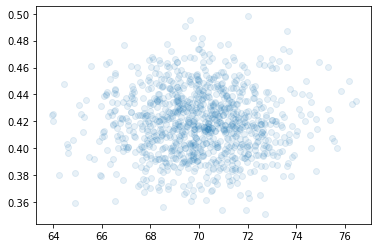

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.00712029]
 [0.00712029 1.        ]]
Class number: 9
(5949, 3)


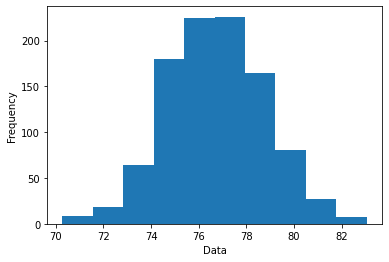

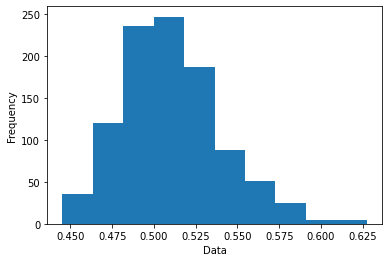

0.5104452172294164 76.71820616231564


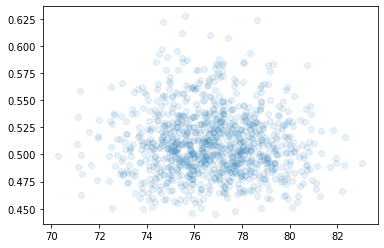

Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.        -0.0352512]
 [-0.0352512  1.       ]]
[113.14869878971314, 89.02582108859326, 76.93915953673952, 73.48112107633617, 65.75503903845367, 96.04837547813278, 89.35538025830303, 76.66977678065165, 69.59448417083033, 76.20776094508622]


In [ ]:
# 3D case
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
v_org = []
v_tsne = []
v_plot = []
expectations = []
q1 = []
q3 = []

for number in range(10):
  print("Class number: " + str(number))
  v, v_s = original_data_bootstrap(hashmaps, number, 3)
  v_org.append(v)
  # tsne_var, tsne_mean, q1_val, q3_val = tsne_data_bootstrap(number, Y)
  tsne_var, variances = tsne_data_bootstrap(tsne_data3, number, Y)
  v_tsne.append(tsne_var)
  print(tsne_var, v_org[number])
  plt.scatter(v_s, variances, alpha = 0.1)
  plt.show()
  v_plot.append(np.abs(tsne_var - v_org[number]))

  #perform Kolmogorov-Smirnov test
  # p value almost zero => not from same distribution, and no correlation
  print(ks_2samp(v_s, variances))
  # No correlation too!
  print(np.corrcoef(v_s, variances))
print(v_plot)

Class number: 0
(5923, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00574594]
 [-0.00574594  1.        ]]
Class number: 1
(6742, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.00988494]
 [-0.00988494  1.        ]]
Class number: 2
(5958, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.02074306]
 [-0.02074306  1.        ]]
Class number: 3
(6131, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01540461]
 [0.01540461 1.        ]]
Class number: 4
(5842, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.03335427]
 [-0.03335427  1.        ]]
Class number: 5
(5421, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.01657569]
 [0.01657569 1.        ]]
Class number: 6
(5918, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[ 1.         -0.01908534]
 [-0.01908534  1.        ]]
Class number: 7
(6265, 3)
Ks_2sampResult(statistic=1.0, pvalue=0.0)
[[1.         0.00981786]
 [0.00981786 1.        ]]
Class number: 8
(5851, 3)
Ks

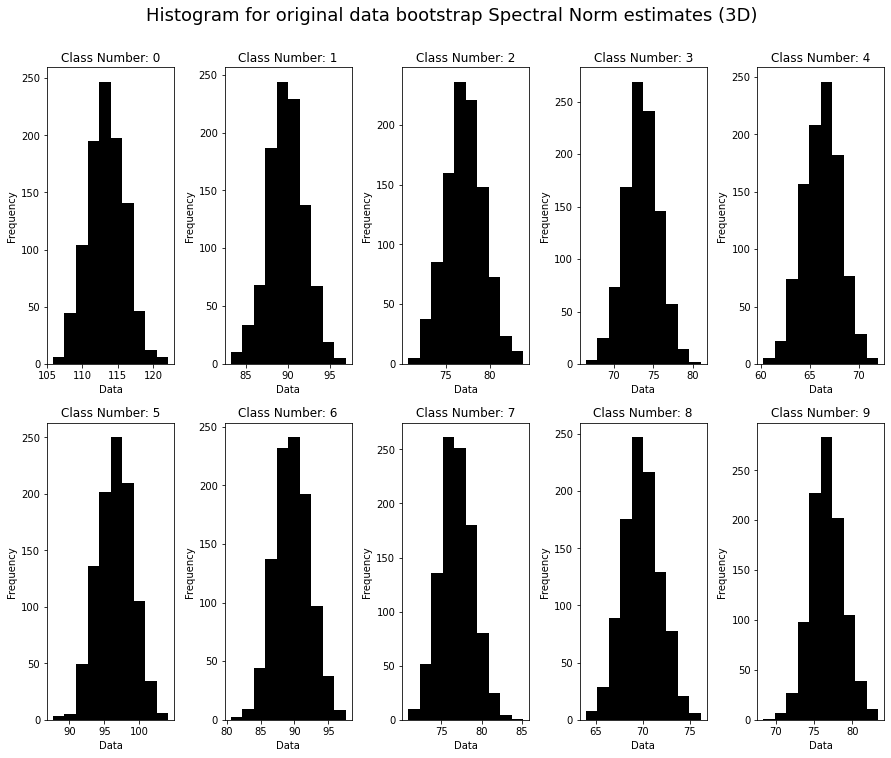

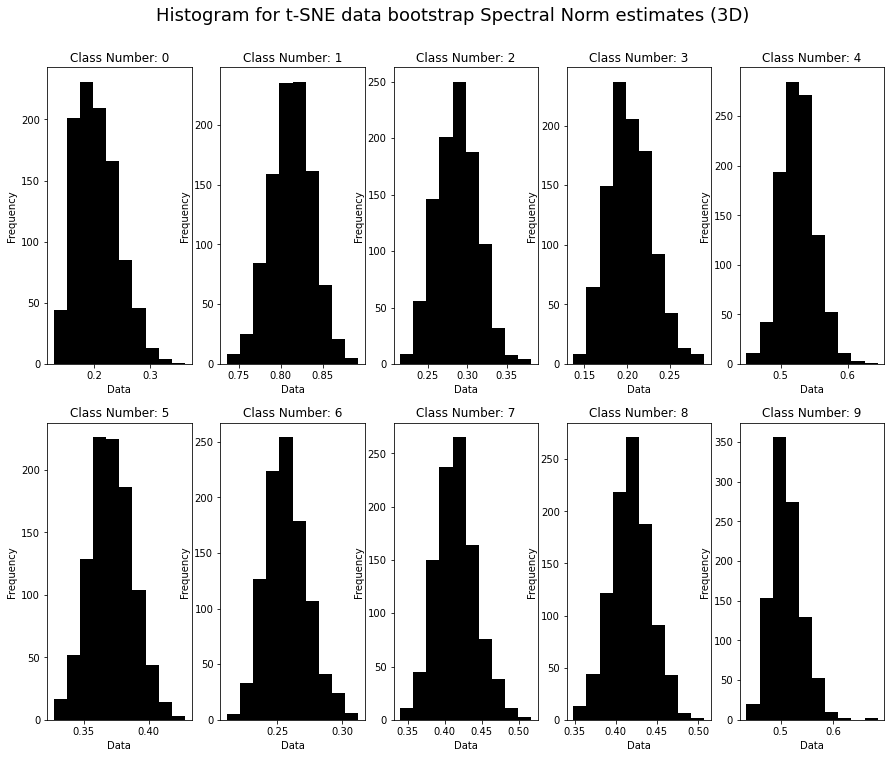

In [ ]:
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
v_org = []
v_tsne = []
v_plot = []
expectations = []
q1 = []
q3 = []

fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=5)
fig.subplots_adjust(wspace=0.4)
plt.suptitle("Histogram for original data bootstrap Spectral Norm estimates (3D)", fontsize=18, y=0.95)

axes = axes.flatten()

fig2, axes2 = plt.subplots(figsize=(15, 12), nrows=2, ncols=5)
fig.subplots_adjust(wspace=0.4)
plt.suptitle("Histogram for t-SNE data bootstrap Spectral Norm estimates (3D)", fontsize=18, y=0.95)

axes2 = axes2.flatten()

for number in range(10):
  print("Class number: " + str(number))
  v, v_s = original_data_bootstrap(hashmaps, number, 3, False)
  axes[number].hist(v_s, color='k')
  axes[number].set_ylabel('Frequency')
  axes[number].set_xlabel('Data')
  axes[number].title.set_text('Class Number: '+ str(number))
  v_org.append(v)

  # tsne_var, tsne_mean, q1_val, q3_val = tsne_data_bootstrap(number, Y, False)
  tsne_var, variances = tsne_data_bootstrap(tsne_data3, number, Y, False)
  axes2[number].hist(variances, color='k')
  axes2[number].set_ylabel('Frequency')
  axes2[number].set_xlabel('Data')
  axes2[number].title.set_text('Class Number: '+ str(number))
  # v_org.append(v)

  v_tsne.append(tsne_var)
  v_plot.append(np.abs(tsne_var - v_org[number]))

  #perform Kolmogorov-Smirnov test
  # p value almost zero => not from same distribution, and no correlation
  print(ks_2samp(v_s, variances))
  # No correlation too!
  print(np.corrcoef(v_s, variances))
plt.show()
# print(v_plot)

IndexError: ignored

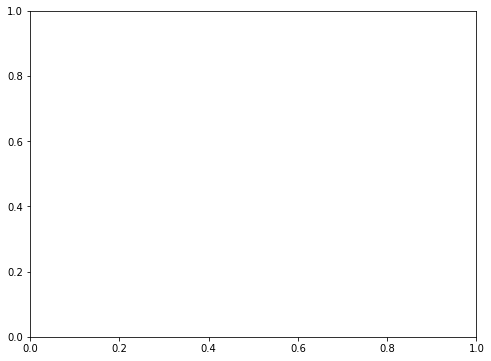

In [ ]:
# # colorscheme
# v = [(0.09019607843137255, 0.12549019607843137, 0.16470588235294117),
#      (0.3176470588235294, 0.1803921568627451, 0.37254901960784315),
#      (0.2901960784313726, 0.13725490196078433, 0.35294117647058826),
#      (0.5568627450980392, 0.26666666666666666, 0.6784313725490196),
#      (0.7647058823529411, 0.6078431372549019, 0.8274509803921568),
#      (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
#      (0.7294117647058823, 0.2901960784313726, 0.0),
#      (0.9607843137254902, 0.6901960784313725, 0.2549019607843137),
#      (0.9725490196078431, 0.7686274509803922, 0.44313725490196076),
#      (0.9882352941176471, 0.9529411764705882, 0.8117647058823529)]


# # v = [(0.56091847477176702, 0.4337815920028113, 0.40529993322542174),
# # (0.9019057645364922, 0.40486281920262385, 0.44494660434372696),
# # (0.14017787135673926, 0.14453863125578225, 0.1152834973874785),
# # (0.63083267993295664, 0.41490272250539673, 0.45426459756164661),
# # (0.77697859494133705, 0.36303988219222216, 0.45998152286644078),
# # (0.16591743275750348, 0.50284988955520828, 0.43123267768728824),
# # (0.16591743275750348, 0.60284988955520828, 0.43123267768728824),
# # (0.16591743275750348, 0.70284988955520828, 0.43123267768728824),
# # (0.15406618756053894, 0.37407489744412198, 0.87185891499533911),
# # (0.20019069588580043, 0.32419824445157241, 0.67561105966262723)]

# #tsne_plot
# fig = plt.figure(figsize=(8, 6))
# ax = plt.axes()
# cmap = matplotlib.cm.get_cmap('magma')
# normalize = matplotlib.colors.Normalize(vmin=min(Y), vmax=max(Y))
# colors = [cmap(normalize(value)) for value in Y]
# sc = plt.scatter(tsne_data[:,0], tsne_data[:,1], color=colors, s=8)
# cax, _ = matplotlib.colorbar.make_axes(ax)
# cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
# circles = []

# for i in range(10):
#   radius = v_plot[i]*5
#   circle_x=plt.Circle(expectations[i],radius, alpha=0.3, label='Index' + str(i), color = v[i])
#   circles.append(circle_x)
#   ax.add_patch(circle_x)
# plt.legend(circles, range(0, 10))
# plt.show()

In [ ]:
# #multiple_circles centered at q1, mean, q3

# fig = plt.figure(figsize=(8, 6))
# ax = plt.axes()
# cmap = matplotlib.cm.get_cmap('magma')
# normalize = matplotlib.colors.Normalize(vmin=min(Y), vmax=max(Y))
# colors = [cmap(normalize(value)) for value in Y]
# sc = plt.scatter(tsne_data[:,0], tsne_data[:,1], color=colors, s=8)
# cax, _ = matplotlib.colorbar.make_axes(ax)
# cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
# circles = []

# for i in range(10):
#   radius = v_plot[i]
#   print(v_plot)
#   circle_x=plt.Circle(expectations[i],radius, alpha=0.3, label='Index' + str(i), color = v[i])
#   circle_y=plt.Circle(q1[i],radius, alpha=0.3, label='Index' + str(i), color = v[i])
#   circle_z=plt.Circle(q3[i],radius, alpha=0.3, label='Index' + str(i), color = v[i])
#   circles.append(circle_x)
#   circles.append(circle_y)
#   circles.append(circle_z)
#   ax.add_patch(circle_x)
#   ax.add_patch(circle_y)
#   ax.add_patch(circle_z)
# plt.legend(circles, range(0, 10))
# plt.show()

In [ ]:
# def tsne_data_bootstrap_ellipse(index, Y):
#   tsne0 = tsne_data[np.array(Y) == index]
#   iters = 200
#   num_samples = 600
#   variances_x = []
#   variances_y = []
#   expectations = []

#   for i in range(iters):
#     # Estimate mean and standard error
#     rand_rows = tsne0[np.random.choice(tsne0.shape[0], size=num_samples, replace=False), :]
#     mean_x, mean_y = np.mean(rand_rows[:, 0]), np.mean(rand_rows[:, 1])
#     variance_x = np.sum((rand_rows[:, 0] - mean_x)**2)
#     variance_y = np.sum((rand_rows[:, 1] - mean_y)**2)
#     variances_x.append(variance_x)
#     variances_y.append(variance_y)
#     expectations.append((mean_x, mean_y))

#   # Calculate standard error
#   mean_variance_x, mean_variance_y = np.mean(variances_x), np.mean(variances_y)
#   variance_estimate_x = np.sqrt((1/(num_samples*iters)) * np.sum((variances_x - mean_variance_x)**2))
#   variance_estimate_y = np.sqrt((1/(num_samples*iters)) * np.sum((variances_y - mean_variance_y)**2))
#   mean_val = tuple([sum(y) / len(y) for y in zip(*expectations)])
#   return variance_estimate_x, variance_estimate_y, list(mean_val)

In [ ]:
# v_tsne_x = []
# v_tsne_y = []
# v_plot = []
# expectations_ellipse = []

# for number in range(10):
#   v_org.append(original_data_bootstrap(number))
#   tsne_var_x, tsne_var_y, tsne_mean = tsne_data_bootstrap_ellipse(number, Y)
#   v_tsne_x.append(tsne_var_x)
#   v_tsne_y.append(tsne_var_y)
#   expectations_ellipse.append(tsne_mean)
#   v_plot.append([np.abs(tsne_var_x - v_org[number]), np.abs(tsne_var_y - v_org[number])])

In [ ]:
# expectations_ellipse

In [ ]:
# #ellipses instead of circles

# fig = plt.figure(figsize=(8, 6))
# ax = plt.axes()
# cmap = matplotlib.cm.get_cmap('magma')
# normalize = matplotlib.colors.Normalize(vmin=min(Y), vmax=max(Y))
# colors = [cmap(normalize(value)) for value in Y]
# sc = plt.scatter(tsne_data[:,0], tsne_data[:,1], color=colors, s=8)
# cax, _ = matplotlib.colorbar.make_axes(ax)
# cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
# circles = []

# for i in range(10):
#   radius_x = v_plot[i][0]
#   radius_y = v_plot[i][1]
#   circle=Ellipse(xy=expectations_ellipse[i], width=radius_x, height=radius_y, alpha=0.3, label='Index' + str(i), color = v[i])
#   circles.append(circle)
#   ax.add_patch(circle)
# plt.legend(circles, range(0, 10))
# plt.show()